### Contents

Import Data

Exploring Relationships
    
    - Correlations
    - Scatterplots
    - Pair Plot
    - Categorical Plot
    
Export Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# check matplotlib version
matplotlib.__version__

'3.7.0'

In [3]:
# ensures charts are displayed in notebook
%matplotlib inline

In [4]:
# create path
path = r'/Users/kaitlinkendrick/Documents/Data Analysis/Craft Beer Analysis'

In [5]:
# import data
beer = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean_products_merged.csv'), index_col = False)

### Exploring Relationships

#### Correlations

In [6]:
beer.columns

Index(['Unnamed: 0', 'Product_code', 'Vendor_code', 'Name', 'Retail_price',
       'Base_unit', 'Country_of_Origin', 'Size', 'ABV', 'Amount',
       'Sale_amount', 'Discount_amount', 'Profit', 'Missing_price',
       'Missing_vendor', 'Missing_unit', 'Missing_country', 'Missing_size',
       'Missing_ABV', 'Missing_amount', 'Missing_sale', 'Missing_discount',
       'Missing_profit'],
      dtype='object')

In [7]:
# exclude columns Unnamed: 0, Vendor_code, Name, Base_unit, Country_of_Origin, Amount, and Missing flag columns
lesscol = set(beer.columns)

In [8]:
lesscol.remove('Unnamed: 0')

In [9]:
lesscol.remove('Vendor_code')

In [10]:
lesscol.remove('Name')

In [11]:
lesscol.remove('Base_unit')

In [12]:
lesscol.remove('Country_of_Origin')

In [13]:
lesscol.remove('Missing_price')

In [14]:
lesscol.remove('Missing_vendor')

In [15]:
lesscol.remove('Missing_unit')

In [16]:
lesscol.remove('Missing_country')

In [17]:
lesscol.remove('Missing_size')

In [18]:
lesscol.remove('Missing_ABV')

In [19]:
lesscol.remove('Missing_amount')

In [20]:
lesscol.remove('Missing_sale')

In [21]:
lesscol.remove('Missing_discount')

In [22]:
lesscol.remove('Missing_profit')

In [23]:
lesscol = list(lesscol)

In [24]:
beer2 = beer[lesscol]

In [25]:
beer2.columns

Index(['Product_code', 'Sale_amount', 'Profit', 'Size', 'ABV', 'Amount',
       'Retail_price', 'Discount_amount'],
      dtype='object')

In [26]:
# create correlation matrix using pandas
beer2.corr()

,Product_code,Sale_amount,Profit,Size,ABV,Amount,Retail_price,Discount_amount
Product_code,1.000000,0.078906,0.042404,0.012989,0.032872,0.016439,0.158679,0.152385
Sale_amount,0.078906,1.000000,0.967130,0.129789,-0.031148,0.775484,0.181833,0.556466
Profit,0.042404,0.967130,1.000000,0.124470,-0.058502,0.765586,0.115764,0.432686
Size,0.012989,0.129789,0.124470,1.000000,-0.024252,0.049662,0.220045,0.062882
ABV,0.032872,-0.031148,-0.058502,-0.024252,1.000000,-0.092729,0.220953,0.011703
Amount,0.016439,0.775484,0.765586,0.049662,-0.092729,1.000000,-0.081495,0.503713
Retail_price,0.158679,0.181833,0.115764,0.220045,0.220953,-0.081495,1.000000,0.201945
Discount_amount,0.152385,0.556466,0.432686,0.062882,0.011703,0.503713,0.201945,1.000000


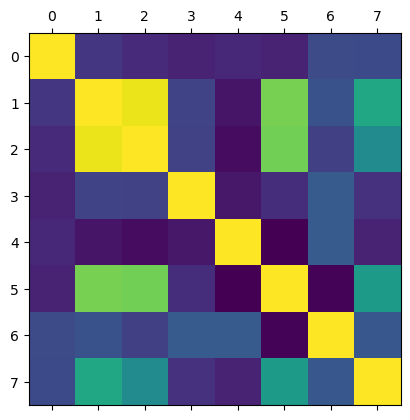

In [27]:
# create correlation heatmap using matplotlib
plt.matshow(beer2.corr())
plt.show()

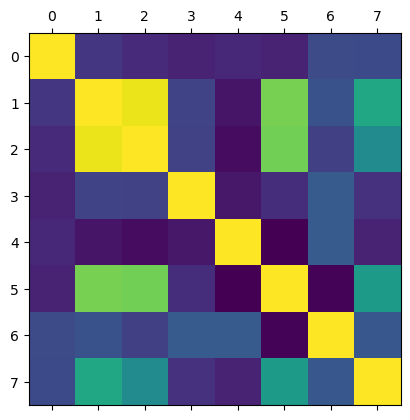

In [28]:
# save heatmap
plt.matshow(beer2.corr())
plt.savefig('heatmap.png')

Text(0.5, 1.0, 'Correlation Matrix')

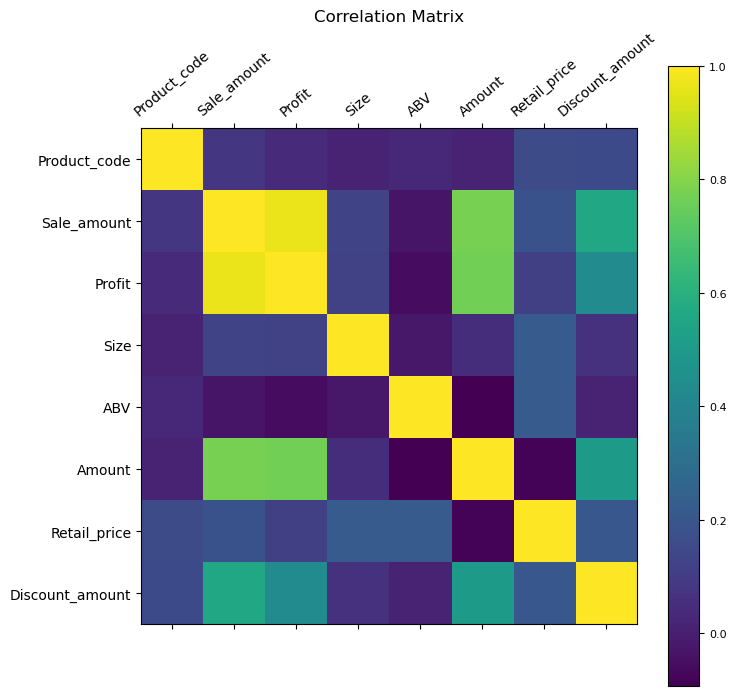

In [29]:
# add legend, formatting
f = plt.figure(figsize=(8 , 8))
plt.matshow(beer2.corr(), fignum=f.number)
plt.xticks(range(beer2.shape[1]), beer2.columns, fontsize=10, rotation=40)
plt.yticks(range(beer2.shape[1]), beer2.columns, fontsize=10)
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=12)

Seaborn heatmap

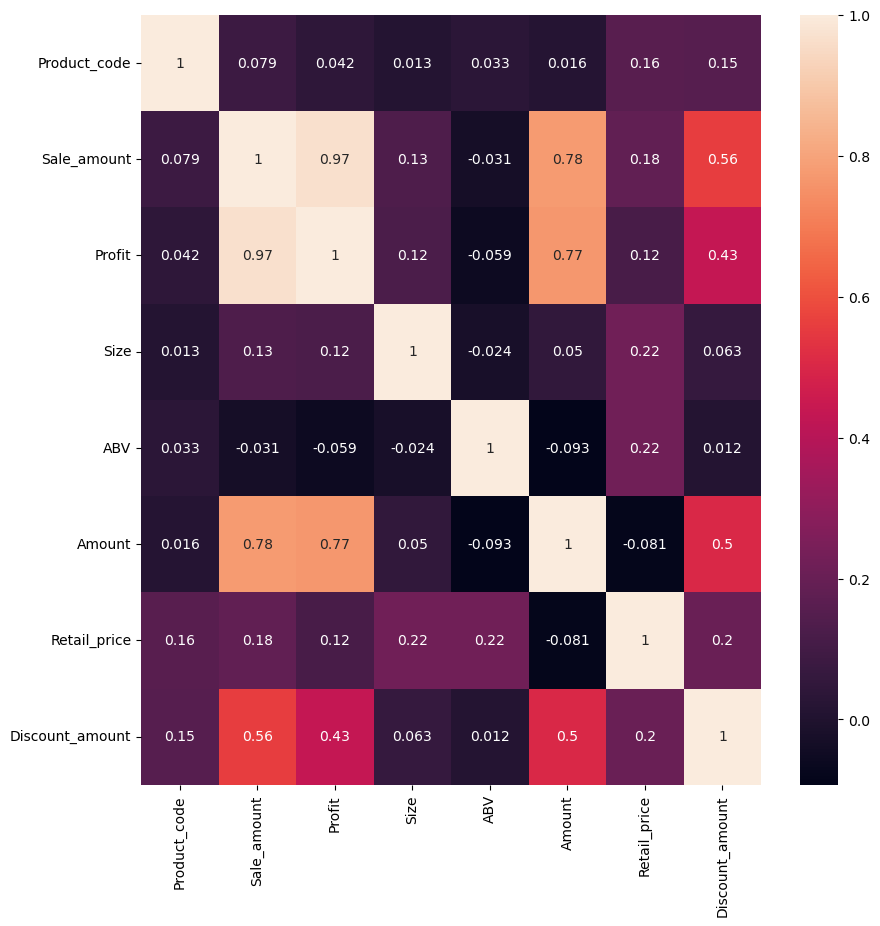

In [30]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(beer2.corr(), annot = True, ax = ax)

There are 6 correlations that I want to look at more closely as each of these are a .4 or higher. These 6 are amount/profit, amount/sale_amount, amount/discount_amount, profit/sale_amount, profit/discount_amount, sale_amount/discount_amount.

#### Scatterplots

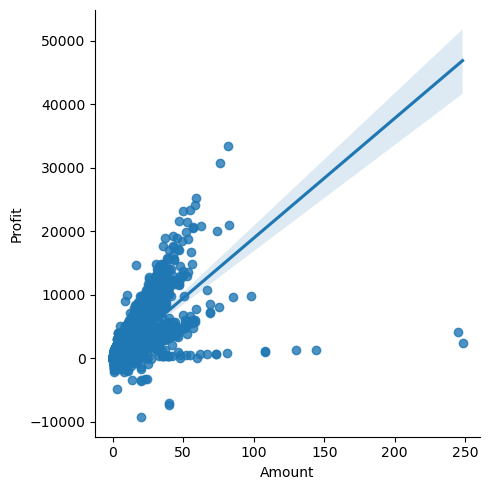

In [31]:
# create scatterplot for heatmap correlations in Seaborn
sns.lmplot(x = 'Amount', y = 'Profit', data = beer2)

There is a strong positive correlation between the profit made and the amount of beer sold. This makes sense as a correlation. There are a few outliers shown on this chart such as the two dots around 250 sold but less than $10,000 in profit.

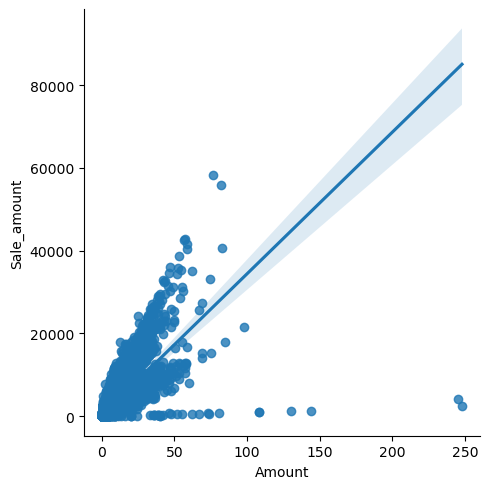

In [32]:
sns.lmplot(x = 'Amount', y = 'Sale_amount', data = beer2)

There is a strong positive correlation here which makes sense because the amount of beer sold would have an impact on the total amount of money made for those sales. Again, there are two outliers of 250 units of beer sold sitting well under $20,000. 

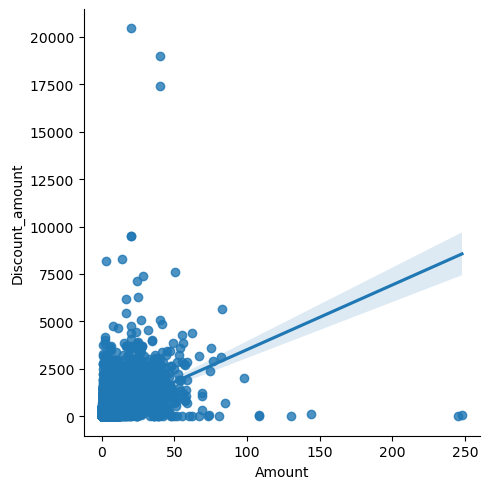

In [33]:
sns.lmplot(x = 'Amount', y = 'Discount_amount', data = beer2)

There is a positive correlation between the amount of beer sold and the amount of money deducted from the original product price. The same two outliers are present here as well as three more outliers between 25-50 units sold and a discount amount between $17,500-$20,000. 

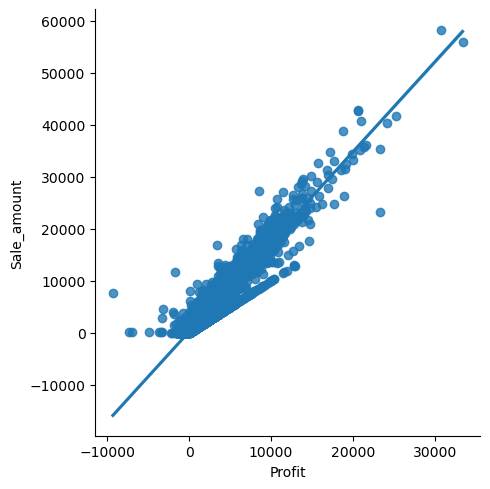

In [34]:
sns.lmplot(x = 'Profit', y = 'Sale_amount', data = beer2)

There is a very strong positive correlation between the total amount of money made from beer sales and the profit made. There are really no outliers in this plot. 

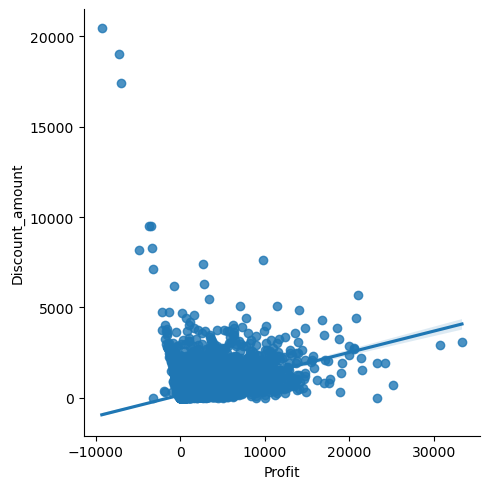

In [35]:
sns.lmplot(x = 'Profit', y = 'Discount_amount', data = beer2)

There is a lower correlation between profit and discount_amount than previous correlations. There are three outliers where the profits are less than zero and the discount amount is above or close to $20,000. 

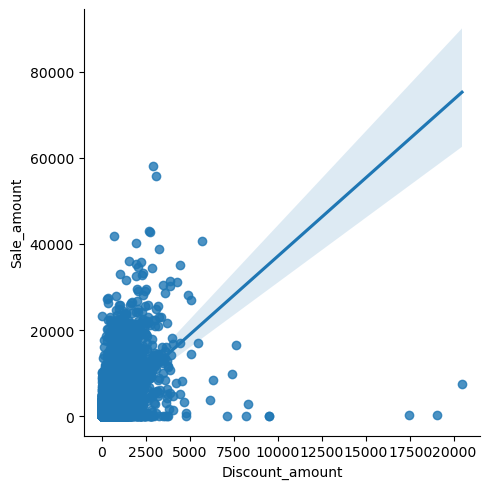

In [36]:
sns.lmplot(x = 'Discount_amount', y = 'Sale_amount', data = beer2)

There is a positive correlation between the discount and sale amounts, however the points are all clustered at the lower end of the chart. There are three large outliers of discount amounts over $17,500 with sale amounts of under $20,000. 

In [37]:
beer.columns

Index(['Unnamed: 0', 'Product_code', 'Vendor_code', 'Name', 'Retail_price',
       'Base_unit', 'Country_of_Origin', 'Size', 'ABV', 'Amount',
       'Sale_amount', 'Discount_amount', 'Profit', 'Missing_price',
       'Missing_vendor', 'Missing_unit', 'Missing_country', 'Missing_size',
       'Missing_ABV', 'Missing_amount', 'Missing_sale', 'Missing_discount',
       'Missing_profit'],
      dtype='object')

#### Pair Plots

In [38]:
beer3 = beer[['Amount', 'Profit', 'Sale_amount', 'Discount_amount']]

In [39]:
beer3

,Amount,Profit,Sale_amount,Discount_amount
0,2.00,140.00,420.00,180.00
1,4.00,400.00,960.00,240.00
2,5.00,740.00,1440.00,60.00
3,4.00,52.23,412.23,277.77
4,2.00,180.00,360.00,40.00
...,...,...,...,...
51437,10.25,3637.55,7040.55,339.45
51438,13.25,4455.37,8854.37,685.63
51439,1.00,332.91,664.91,55.09
51440,NaN,NaN,NaN,NaN


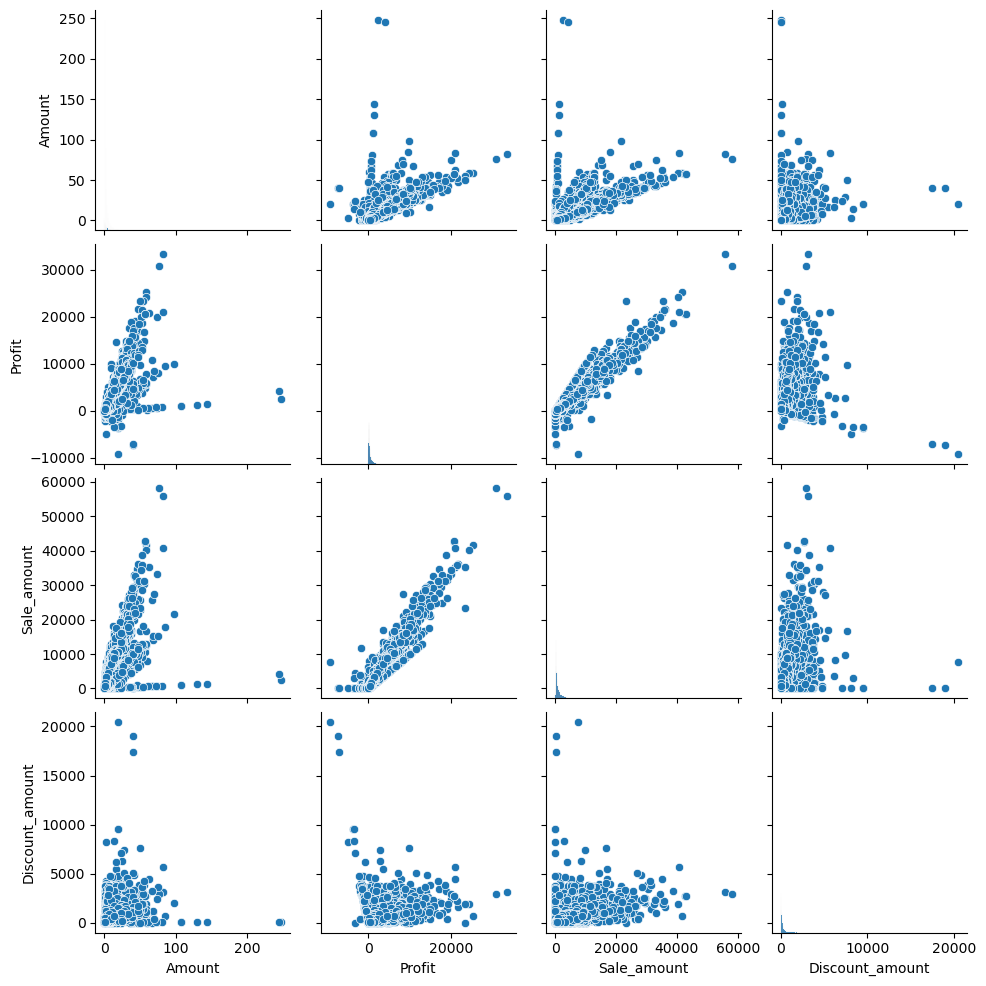

In [40]:
# create pair plot
g = sns.pairplot(beer3)

From these charts it appears that profit and sale amount have a greater impact on the amount of products that are sold than the discount amount. Profit is greatly impacted by the sale amount, which can be expected, and appears to be impacted by discount amount as well, although a higher discount doesn't appear to directly correlate with higher profit. It would be good to look closer at the way that the discount amount impacts the sale price of the beer and how that can affect sales. 

#### Categorical Plots

<Axes: xlabel='Retail_price', ylabel='Count'>

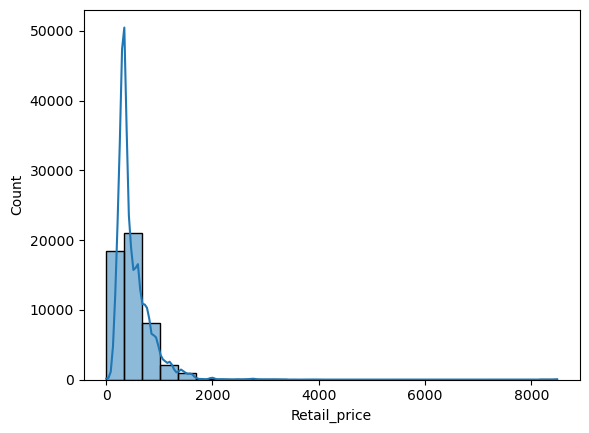

In [51]:
# create histogram of usertype
sns.histplot(beer['Retail_price'], bins = 25, kde = True)

In [52]:
beer.loc[beer['Retail_price'] < 400, 'Cost'] = 'cheap'

In [53]:
beer.loc[(beer['Retail_price'] >= 400) & (beer['Retail_price'] < 1000), 'Cost'] = 'average'

In [54]:
beer.loc[beer['Retail_price'] >= 1000, 'Cost'] = 'expensive'

In [55]:
beer['Cost'].value_counts(dropna = False)

cheap        25734
average      21504
expensive     3767
NaN            437
Name: Cost, dtype: int64

In [56]:
beer.columns

Index(['Unnamed: 0', 'Product_code', 'Vendor_code', 'Name', 'Retail_price',
       'Base_unit', 'Country_of_Origin', 'Size', 'ABV', 'Amount',
       'Sale_amount', 'Discount_amount', 'Profit', 'Missing_price',
       'Missing_vendor', 'Missing_unit', 'Missing_country', 'Missing_size',
       'Missing_ABV', 'Missing_amount', 'Missing_sale', 'Missing_discount',
       'Missing_profit', 'Cost'],
      dtype='object')

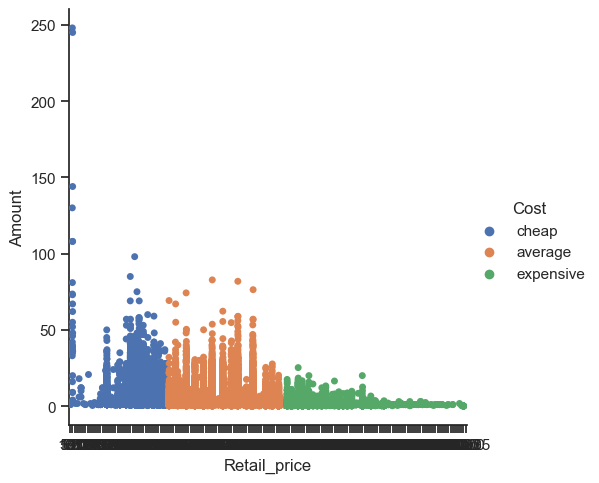

In [57]:
# create categorical plot using age categories above
sns.set(style='ticks')
g = sns.catplot(x='Retail_price', y='Amount', hue='Cost', data=beer)

This shows that there are a very even amount of cheap and average beers sold but much fewer expensive beers (over $1000). The focus should be on beers that retail for less than $1000. 

In [58]:
# save figure
g.savefig('categorical.png')

### Export Data

In [59]:
beer.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean_beer.csv'))